# ESPAAN

In [1]:
!rm -r spaan
!git clone git://github.com/nicolagulmini/spaan
!pip install Bio

Cloning into 'spaan'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 123 (delta 69), reused 54 (delta 22), pack-reused 0
Receiving objects: 100% (123/123), 739.30 KiB | 2.88 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
from spaan.data_processing import *
from spaan.Expanded_SPAAN_Model import *
from Bio import SeqIO
import numpy as np

In [3]:
# load the datasets (it requires about 1 minute)
x, y = process(list(SeqIO.parse("spaan/data/original_adh_dataset.fasta", "fasta")), list(SeqIO.parse("spaan/data/original_negative_dataset.fasta", "fasta")))

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = split_ds(np.array(x), np.array(y), np.random.permutation(len(x)))
# fix the warning of the nested lists!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [5]:
# method for fitting in the multi-input neural network
def fit_in_nn(x):
    x_1, x_2, x_3, x_4, x_5, x_6, x_7 = [[] for _ in range(7)]
    for el in x:
        x_1.append(el[0])
        x_2.append(el[1])
        x_3.append(el[2])
        x_4.append(el[3])
        x_5.append(el[4])
        x_6.append(el[5])
        x_7.append(el[6])
    return np.array(x_1), np.array(x_2), np.array(x_3), np.array(x_4), np.array(x_5), np.array(x_6), np.array(x_7)

In [14]:
# model instantiation
espaan_model = Expanded_SPAAN_Model()
epochs = 500

In [15]:
history = espaan_model.get_model().fit(
    x=fit_in_nn(x_train),
    y=y_train,
    batch_size=32, # default
    epochs=epochs, # the original paper has 10k epochs!
    verbose=0, # 1 or 2 to watch the evolution
    validation_data=(fit_in_nn(x_val), y_val),
    shuffle=True    
    )

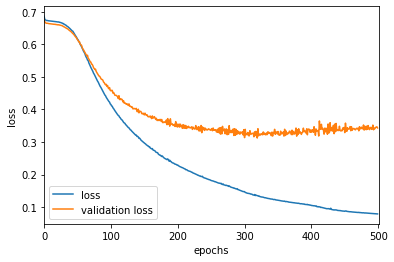

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='validation loss')

plt.legend(loc="lower left")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0, epochs+1)
plt.show()

In [17]:
print("Test accuracy: " + str(espaan_model.get_model().evaluate(
    x=fit_in_nn(x_test),
    y=y_test   
    )[1]))

9/9 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8936
Test accuracy: 0.8936170339584351


In [18]:
espaan_model.get_model().save('model.h5')